# TODO Convert Into Script

In [1]:
# import sys
# import os
# from pathlib import Path
# sys.path.append(str(Path(os.getcwd()) / "ranch"))


In [2]:

import conflate_linestrings
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString, Point

[<LINESTRING (0 0, 500 0)>, <LINESTRING (0 50, 500 50)>, <LINESTRING (0 100, 500 100)>, <LINESTRING (0 150, 500 150)>, <LINESTRING (0 200, 500 200)>, <LINESTRING (0 250, 500 250)>, <LINESTRING (0 300, 500 300)>, <LINESTRING (0 350, 500 350)>, <LINESTRING (0 400, 500 400)>, <LINESTRING (0 450, 500 450)>, <LINESTRING (0 500, 500 500)>, <LINESTRING (1000 1000, 1300 1000)>, <LINESTRING (1000 1010, 1200 1010)>]


<Axes: >

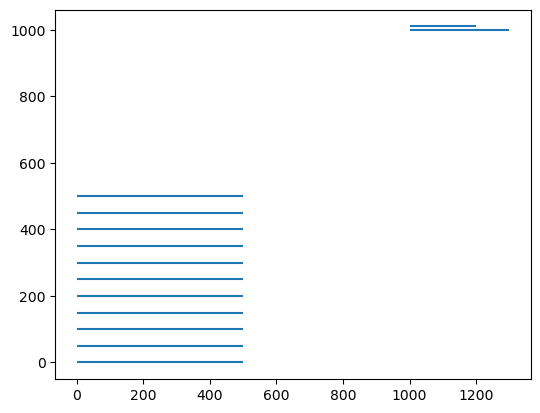

In [16]:
segment_length = 500
delta = 50
num_segments = 11
base_geoms = [
    LineString([(0, height), (segment_length, height)])
    for height in range(0, delta*num_segments, delta)
] + [
    LineString([(1000, 1000), (1300, 1000)]),
    LineString([(1000, 1010), (1200, 1010)])
]
print(base_geoms)
gpd.GeoSeries(base_geoms).plot()

In [17]:
from numpy.random import rand
import numpy as np
rnd = lambda: rand() * 10 - 5

<Axes: >

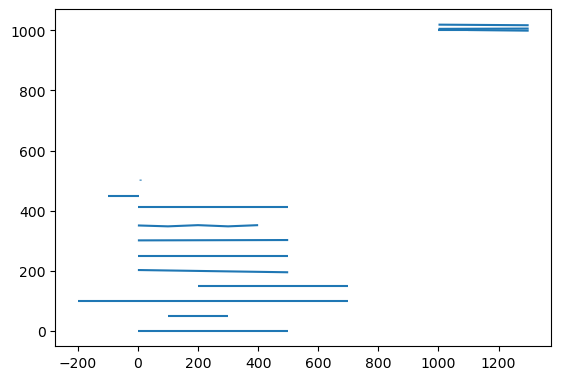

In [18]:
np.random.seed(seed=10)
test_cases = [
    (LineString([(0, 0), (segment_length, 0)]), "identity"),
    (LineString([(100, delta), (300, delta)]),"new segment is shorter then base"),
    (LineString([(-200, delta*2), (700, delta*2)]), "new segment is longer then base"),
    (LineString([(200, delta*3), (700, delta*3)]), "linestring overlaps an amount"),
    (LineString([(0, delta*4 + rnd()), (segment_length, delta*4 + rnd())]), "segment is approximate match"),
    (LineString([(segment_length, delta*5), (0, delta*5)]), "linestrings reversed"),
    (LineString([(0, delta*6 + rnd()), (segment_length, delta*6 + rnd())]), "approximate match"),
    (LineString([(0, delta*7+1), (100, delta*7-2), (200, delta*7+2), (300, delta*7-2), (400, delta*7+2)]), "many self intersections"),
    (LineString([(0, delta*8 + 12), (segment_length, delta*8 + 12)]), "almost within buffer"),
    (LineString([(-100, delta*9), (4, delta*9)]), "not enough overlap"),
    (LineString([(9, delta*10), (9.02, delta*10 + 3.5)]), "large angle but small error"),
    # Simple cases done check multioverlap merging with linestring(1000 1000, 1200 1000), 
    (LineString([(1000, 1001),(1100, 1001)]), "multi overlap decision"),
    (LineString([(1100, 1001),(1300, 999)]), "multi overlap decision"),
    (LineString([(1000, 1005),(1300, 1006)]), "multi overlap decision"),
    (LineString([(1000, 1019),(1300, 1017)]), "multi overlap decision"),
]
a, c = zip(*test_cases)
# gpd.GeoSeries(a).plot()
gpd.GeoSeries(a).plot()